### Importação das bibliotecas e base de dados
Importa a biblioteca pandas, carrega a base de dados CSV a partir do Google Drive e exibe as primeiras 5 linhas da tabela para visualização.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

data = pd.read_csv('dataset_tratado.csv')

pd.set_option('display.max_columns', None)

print(f'Dimensões: {data.shape}')
print(f'Colunas: {data.columns}')

data.head(5)

Dimensões: (4753, 24)
Colunas: Index(['Idade', 'Gênero', 'Cor/Raça', 'Horas com trabalho doméstico e cuidado',
       'PCD', 'Estado onde mora', 'Região onde mora', 'Roubos de veículo',
       'Roubos de carro', 'Roubos de moto', 'Roubos de bicicleta',
       'Roubos fora do domicílio', 'Total de roubos', 'Nivel de segurança',
       'Nível de ensino', 'Área de formação', 'Situação atual de trabalho',
       'Cargo atual', 'Nível', 'Faixa salarial', 'Tempo de experiência',
       'Forma de trabalho atual',
       'Decisão da empresa para modelo 100% presencial',
       'Forma de trabalho ideal'],
      dtype='object')


,Idade,Gênero,Cor/Raça,Horas com trabalho doméstico e cuidado,PCD,Estado onde mora,Região onde mora,Roubos de veículo,Roubos de carro,Roubos de moto,Roubos de bicicleta,Roubos fora do domicílio,Total de roubos,Nivel de segurança,Nível de ensino,Área de formação,Situação atual de trabalho,Cargo atual,Nível,Faixa salarial,Tempo de experiência,Forma de trabalho atual,Decisão da empresa para modelo 100% presencial,Forma de trabalho ideal
0,31,Masculino,Branca,16.5,Não,Minas Gerais (MG),Sudeste,92.0,67.0,25.0,23.0,565.0,749.0,Moderado,Doutorado ou Phd,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Modelo híbrido,Vou procurar outra oportunidade no modelo 100%...,Modelo 100% remoto
1,30,Masculino,Branca,16.5,Não,Espírito Santo (ES),Sudeste,92.0,67.0,25.0,23.0,565.0,749.0,Moderado,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ),Analista de BI/BI Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 3 a 4 anos,Modelo 100% remoto,Vou procurar outra oportunidade no modelo híbr...,Modelo 100% remoto
2,37,Feminino,Amarela,17.0,Não,São Paulo (SP),Sudeste,92.0,67.0,25.0,23.0,565.0,749.0,Moderado,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Analista de Dados/Data Analyst,Júnior,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Modelo híbrido,Vou aceitar e retornar ao modelo 100% presencial,Modelo 100% remoto
3,34,Masculino,Branca,16.5,Não,Minas Gerais (MG),Sudeste,92.0,67.0,25.0,23.0,565.0,749.0,Moderado,Doutorado ou Phd,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Analista de Dados/Data Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Modelo 100% remoto,Vou procurar outra oportunidade no modelo híbr...,Modelo 100% remoto
4,30,Masculino,Branca,16.5,Não,Rio de Janeiro (RJ),Sudeste,92.0,67.0,25.0,23.0,565.0,749.0,Moderado,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ),Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,Modelo 100% remoto


### Gerando base de treinamento e teste
Seleciona os dados de teste e o alvo e codifica os valores categóricos para numéricos e divide a base de dados em treino (70%) e teste (30%)

In [2]:
X_dict = data.drop(columns=['Roubos de veículo',	'Roubos de carro',	'Roubos de moto', 'Roubos de bicicleta',	'Roubos fora do domicílio',	'Total de roubos', 'Forma de trabalho ideal'], axis=1).T.to_dict().values()
vect = DictVectorizer(sparse=False)
X = vect.fit_transform(X_dict)

le = LabelEncoder()
y = le.fit_transform(data.iloc[:, data.shape[1]-1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SMOTE

In [3]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Antes do SMOTE:", Counter(y_train))
smt = SMOTE(sampling_strategy='not majority', random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)
print("Depois do SMOTE:", Counter(y_train))

Antes do SMOTE: Counter({np.int64(2): 2019, np.int64(1): 1708, np.int64(0): 75})
Depois do SMOTE: Counter({np.int64(2): 2019, np.int64(1): 2019, np.int64(0): 2019})


### Treinando o Random Forest
Treina o RandomForest e guarda todas as acurácias em um array, foi separado duas árvores para fins de comparação. Uma com melhor desempenho de acurácia e outra com o pior desempenho

In [4]:
forest = RandomForestClassifier(n_estimators=100, random_state=42, criterion='entropy', max_depth=5)
forest.fit(X_train, y_train)
print(f'Acurácia do treinamento: {forest.score(X_train, y_train)}')

y_pred = forest.predict(X_test)
print(f'Acurácia do teste: {accuracy_score(y_test, y_pred)}')

Acurácia do treinamento: 0.8131087997358428
Acurácia do teste: 0.6971608832807571


              precision    recall  f1-score   support

           0       0.11      0.43      0.17        21
           1       0.71      0.79      0.75       416
           2       0.80      0.63      0.71       514

    accuracy                           0.70       951
   macro avg       0.54      0.62      0.54       951
weighted avg       0.75      0.70      0.71       951

Matriz de confusão: 
[[  9   4   8]
 [ 14 330  72]
 [ 59 131 324]]
Matriz de confusão formatada: 
                        Modelo 100% presencial  Modelo 100% remoto  \
Modelo 100% presencial                       9                   4   
Modelo 100% remoto                          14                 330   
Modelo híbrido                              59                 131   

                        Modelo híbrido  
Modelo 100% presencial               8  
Modelo 100% remoto                  72  
Modelo híbrido                     324  


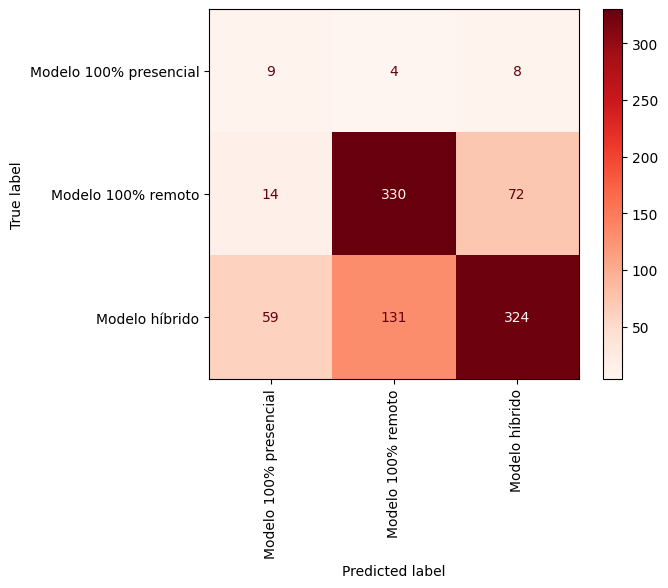

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

print(classification_report(y_test, y_pred))

# Melhor arvore
cnf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de confusão: \n{cnf_matrix}')

df_cnf_matrix = pd.DataFrame(cnf_matrix, index=le.classes_, columns=le.classes_)
print(f'Matriz de confusão formatada: \n{df_cnf_matrix}')

display = ConfusionMatrixDisplay.from_estimator(forest, X_test, y_test, display_labels=le.classes_, cmap=plt.cm.Reds)

plt.xticks(rotation=90)
plt.show()

## Importância das variáveis

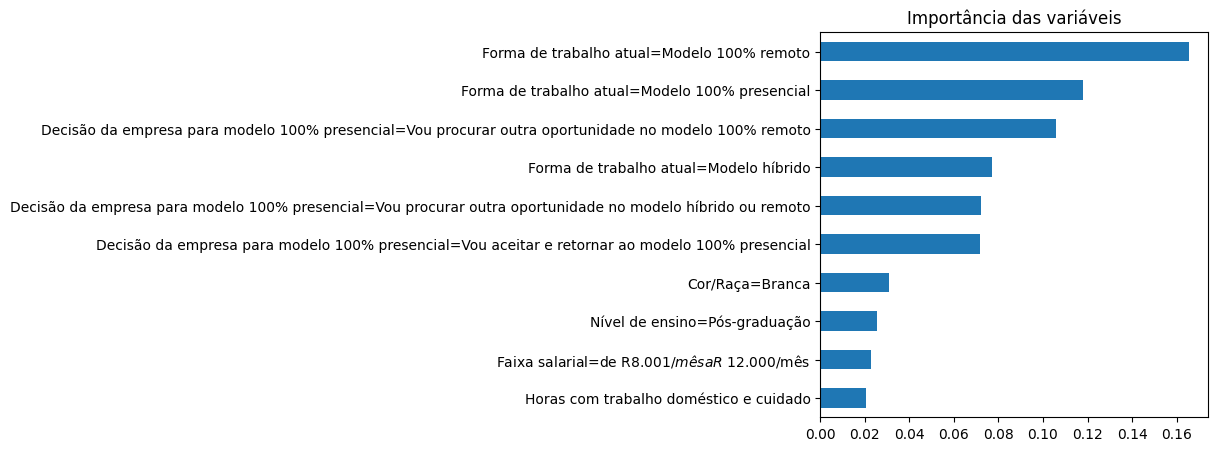

In [6]:
importances = forest.feature_importances_

series = pd.Series(importances, index=vect.get_feature_names_out())
series = series.sort_values(ascending=False).head(10)

plt.figure(figsize=(5, 5))
series.plot(kind='barh', legend=False)
plt.title('Importância das variáveis')
plt.gca().invert_yaxis()

/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


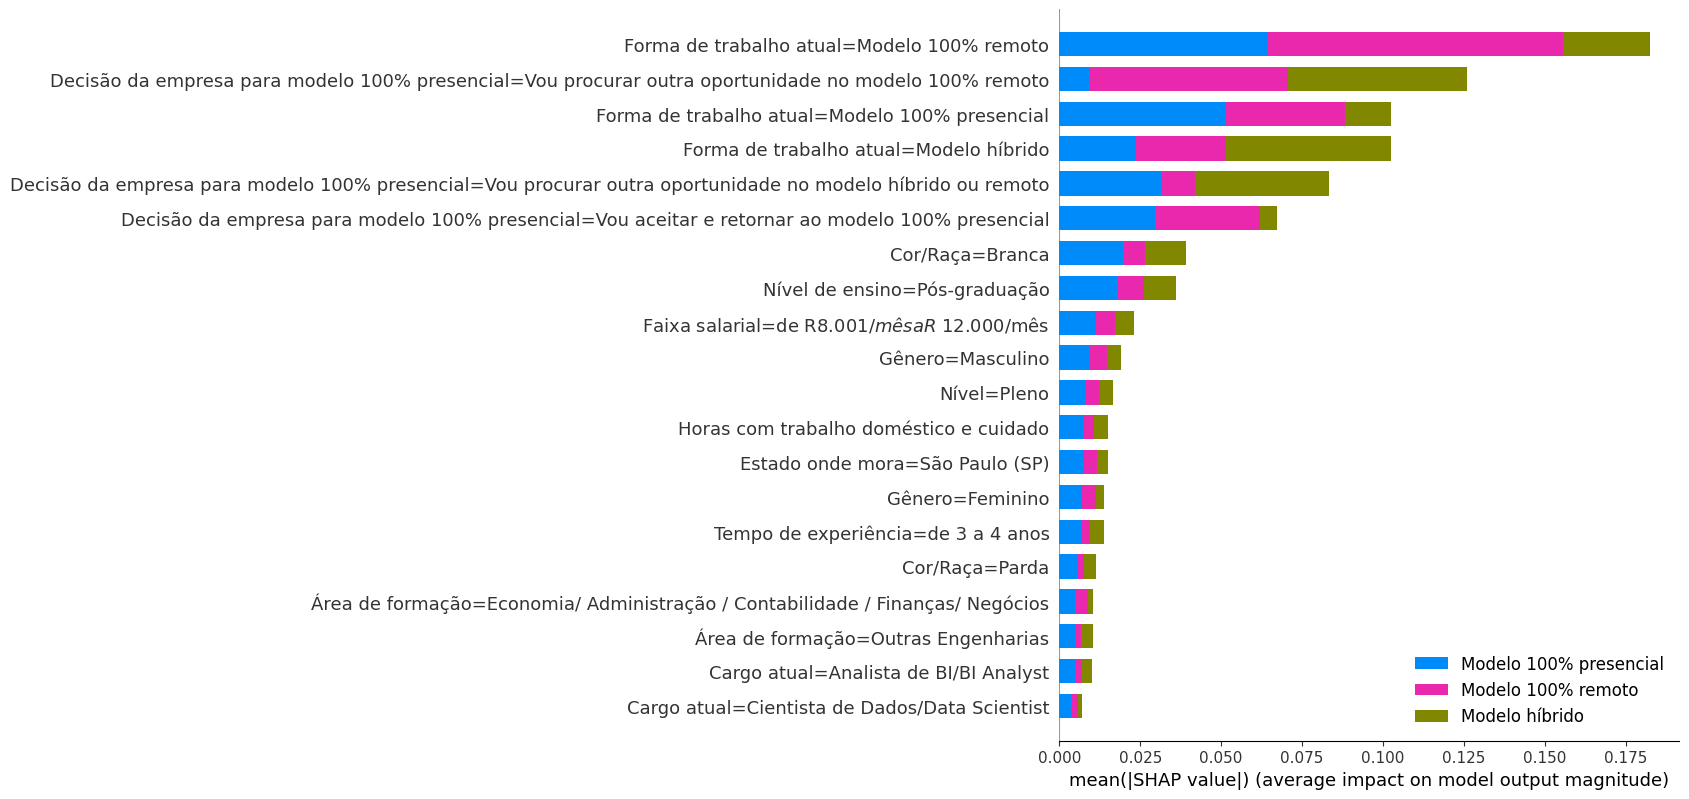

In [7]:
import shap
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

class_names = le.classes_

explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=vect.get_feature_names_out(), plot_type='bar', class_names=class_names)

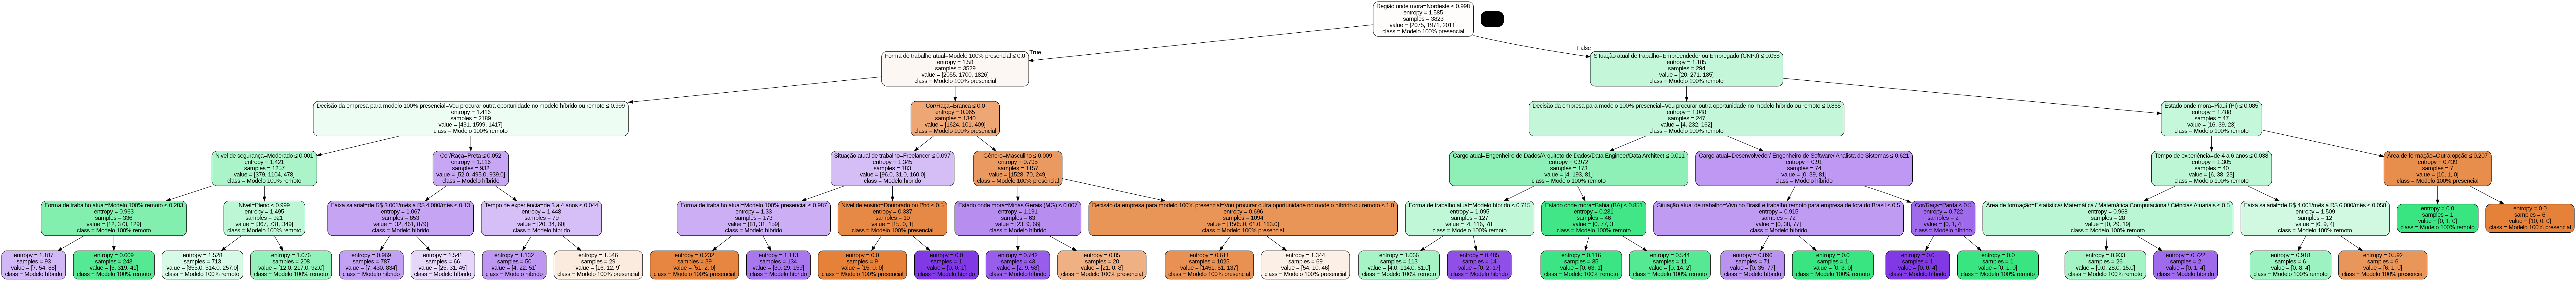

In [9]:
import pydotplus
from sklearn import tree
from IPython.display import Image

dot_data = tree.export_graphviz(forest.estimators_[0], out_file=None, feature_names=vect.get_feature_names_out(), class_names=le.classes_, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())